## Exploratory data analysis - solar data grid

In [37]:
import pandas as pd
import pathlib as path
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot

In [2]:
DATA = path.Path('/home/jovyan/work/data/solar/')

In [3]:
plant1_data = pd.read_csv(DATA/'Plant_1_Generation_Data.csv')
plant1_weather = pd.read_csv(DATA/'Plant_1_Weather_Sensor_Data.csv')
plant2_data = pd.read_csv(DATA/'Plant_2_Generation_Data.csv')
plant2_weather = pd.read_csv(DATA/'Plant_2_Weather_Sensor_Data.csv')

In [65]:
plant1_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [5]:
plant1_weather.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [148]:
plant2_data.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


In [149]:
plant2_weather.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


In [45]:
# datetime.strptime( plant1_data.DATE_TIME[0], '%d-%m-%Y %H:%M').strftime('%x')
# plant1_data.DATE_TIME[:][:10]
df = plant1_data[['DATE_TIME', 'DAILY_YIELD' ]].copy()
df['DATE_TIME'] = df['DATE_TIME'].apply(lambda x : datetime.strptime(x[:10],'%d-%m-%Y' ))
df = df.groupby(['DATE_TIME'] ).max()



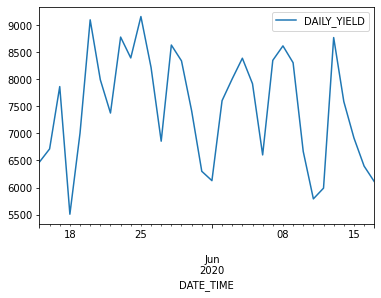

In [47]:
df.plot()
pyplot.show()

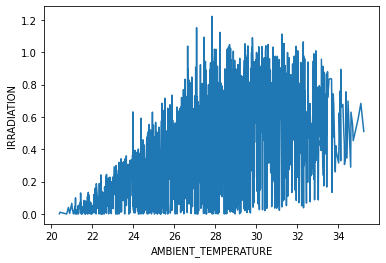

In [66]:
df = plant1_weather[plant1_weather['IRRADIATION']>0]
sns.lineplot(data=df[['AMBIENT_TEMPERATURE', 'IRRADIATION' ]],x='AMBIENT_TEMPERATURE',y='IRRADIATION')

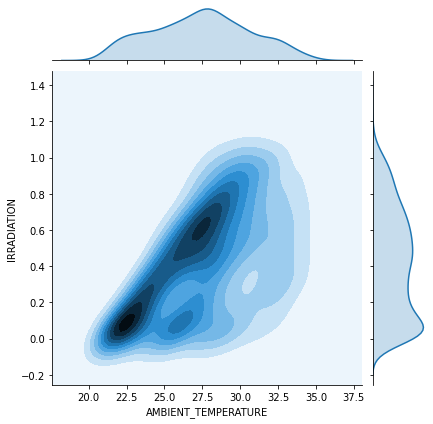

In [60]:
sns.jointplot('AMBIENT_TEMPERATURE','IRRADIATION',df[['AMBIENT_TEMPERATURE', 'IRRADIATION' ]], kind='kde');

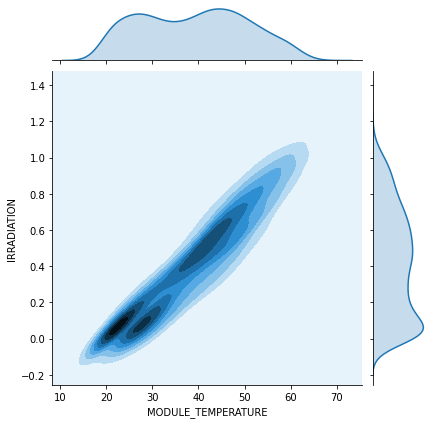

In [61]:
sns.jointplot('MODULE_TEMPERATURE','IRRADIATION',df[['MODULE_TEMPERATURE', 'IRRADIATION' ]], kind='kde');

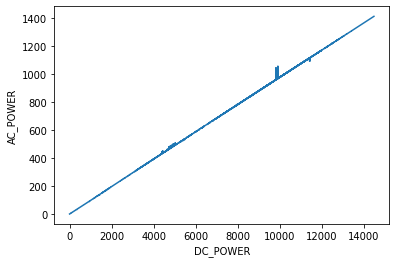

In [58]:
sns.lineplot(data=plant1_data[['DC_POWER', 'AC_POWER' ]],x='DC_POWER',y='AC_POWER')

In [82]:
df_data = plant1_data[plant1_data['AC_POWER']>0][['DATE_TIME', 'DAILY_YIELD', 'AC_POWER']].copy()
df_data['DATE_TIME'] = df_data['DATE_TIME'].apply(lambda x : datetime.strptime(x[:10],'%d-%m-%Y' ))
df_data = df_data.groupby(['DATE_TIME'] ).agg({'DAILY_YIELD':'max','AC_POWER':'median' })
df_data.head()

,DAILY_YIELD,AC_POWER
DATE_TIME,,
2020-05-15,6469.714286,509.662500
2020-05-16,6712.125000,584.417857
2020-05-17,7865.500000,639.960714
2020-05-18,5506.000000,323.014286
2020-05-19,7002.285714,602.218750


In [150]:
df_weather = plant1_weather[plant1_weather['IRRADIATION']>0][['DATE_TIME', 'IRRADIATION']].copy()
df_weather['DATE_TIME'] = df_weather['DATE_TIME'].apply(lambda x : datetime.strptime(x[:10],'%Y-%m-%d' ))
df_weather = df_weather.groupby(['DATE_TIME'] ).mean()
df_weather.head()

,IRRADIATION
DATE_TIME,
2020-05-15,0.352537
2020-05-16,0.358686
2020-05-17,0.440988
2020-05-18,0.293586
2020-05-19,0.368262


In [138]:
df = df_data.merge(df_weather, how="inner", left_index=True, right_index=True)
df.head()

,DAILY_YIELD,AC_POWER,IRRADIATION
DATE_TIME,,,
2020-05-15,6469.714286,509.662500,0.352207
2020-05-16,6712.125000,584.417857,0.420115
2020-05-17,7865.500000,639.960714,0.436442
2020-05-18,5506.000000,323.014286,0.203040
2020-05-19,7002.285714,602.218750,0.386892


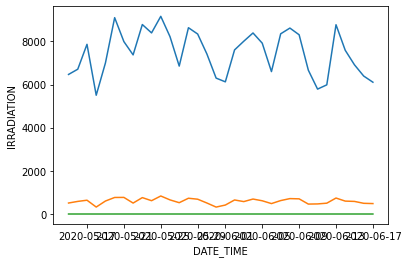

In [146]:
# df.reset_index(inplace=True)
# df = pd.melt( df.reset_index(), id_vars='index', value_vars=['DAILY_YIELD', 'AC_POWER','IRRADIATION'])
sns.lineplot(x="DATE_TIME", y='DAILY_YIELD', data=df)
sns.lineplot(x="DATE_TIME", y='AC_POWER', data=df)
sns.lineplot(x="DATE_TIME", y='IRRADIATION', data=df)

### Plant 2 overview

In [161]:
# Take date and time in Dtime object
plant2_data['DATE_TIME'] = pd.to_datetime(plant2_data['DATE_TIME'],format = '%Y-%m-%d %H:%M')
plant2_weather['DATE_TIME'] = pd.to_datetime(plant2_weather['DATE_TIME'],format = '%Y-%m-%d %H:%M')

In [162]:
# Splitting date and time in separate columns 
plant2_data['DATE'] = plant2_data['DATE_TIME'].apply(lambda x:x.date())
plant2_data['TIME'] = plant2_data['DATE_TIME'].apply(lambda x:x.time())
plant2_weather['DATE'] = plant2_weather['DATE_TIME'].apply(lambda x:x.date())
plant2_weather['TIME'] = plant2_weather['DATE_TIME'].apply(lambda x:x.time())

In [152]:
plant2_data['PLANT_ID'].unique()

array([4136001])

In [153]:
plant2_weather['PLANT_ID'].unique()

array([4136001])

In [156]:
len(plant2_data['SOURCE_KEY'].unique())

22

In [157]:
len(plant2_weather['SOURCE_KEY'].unique())

1

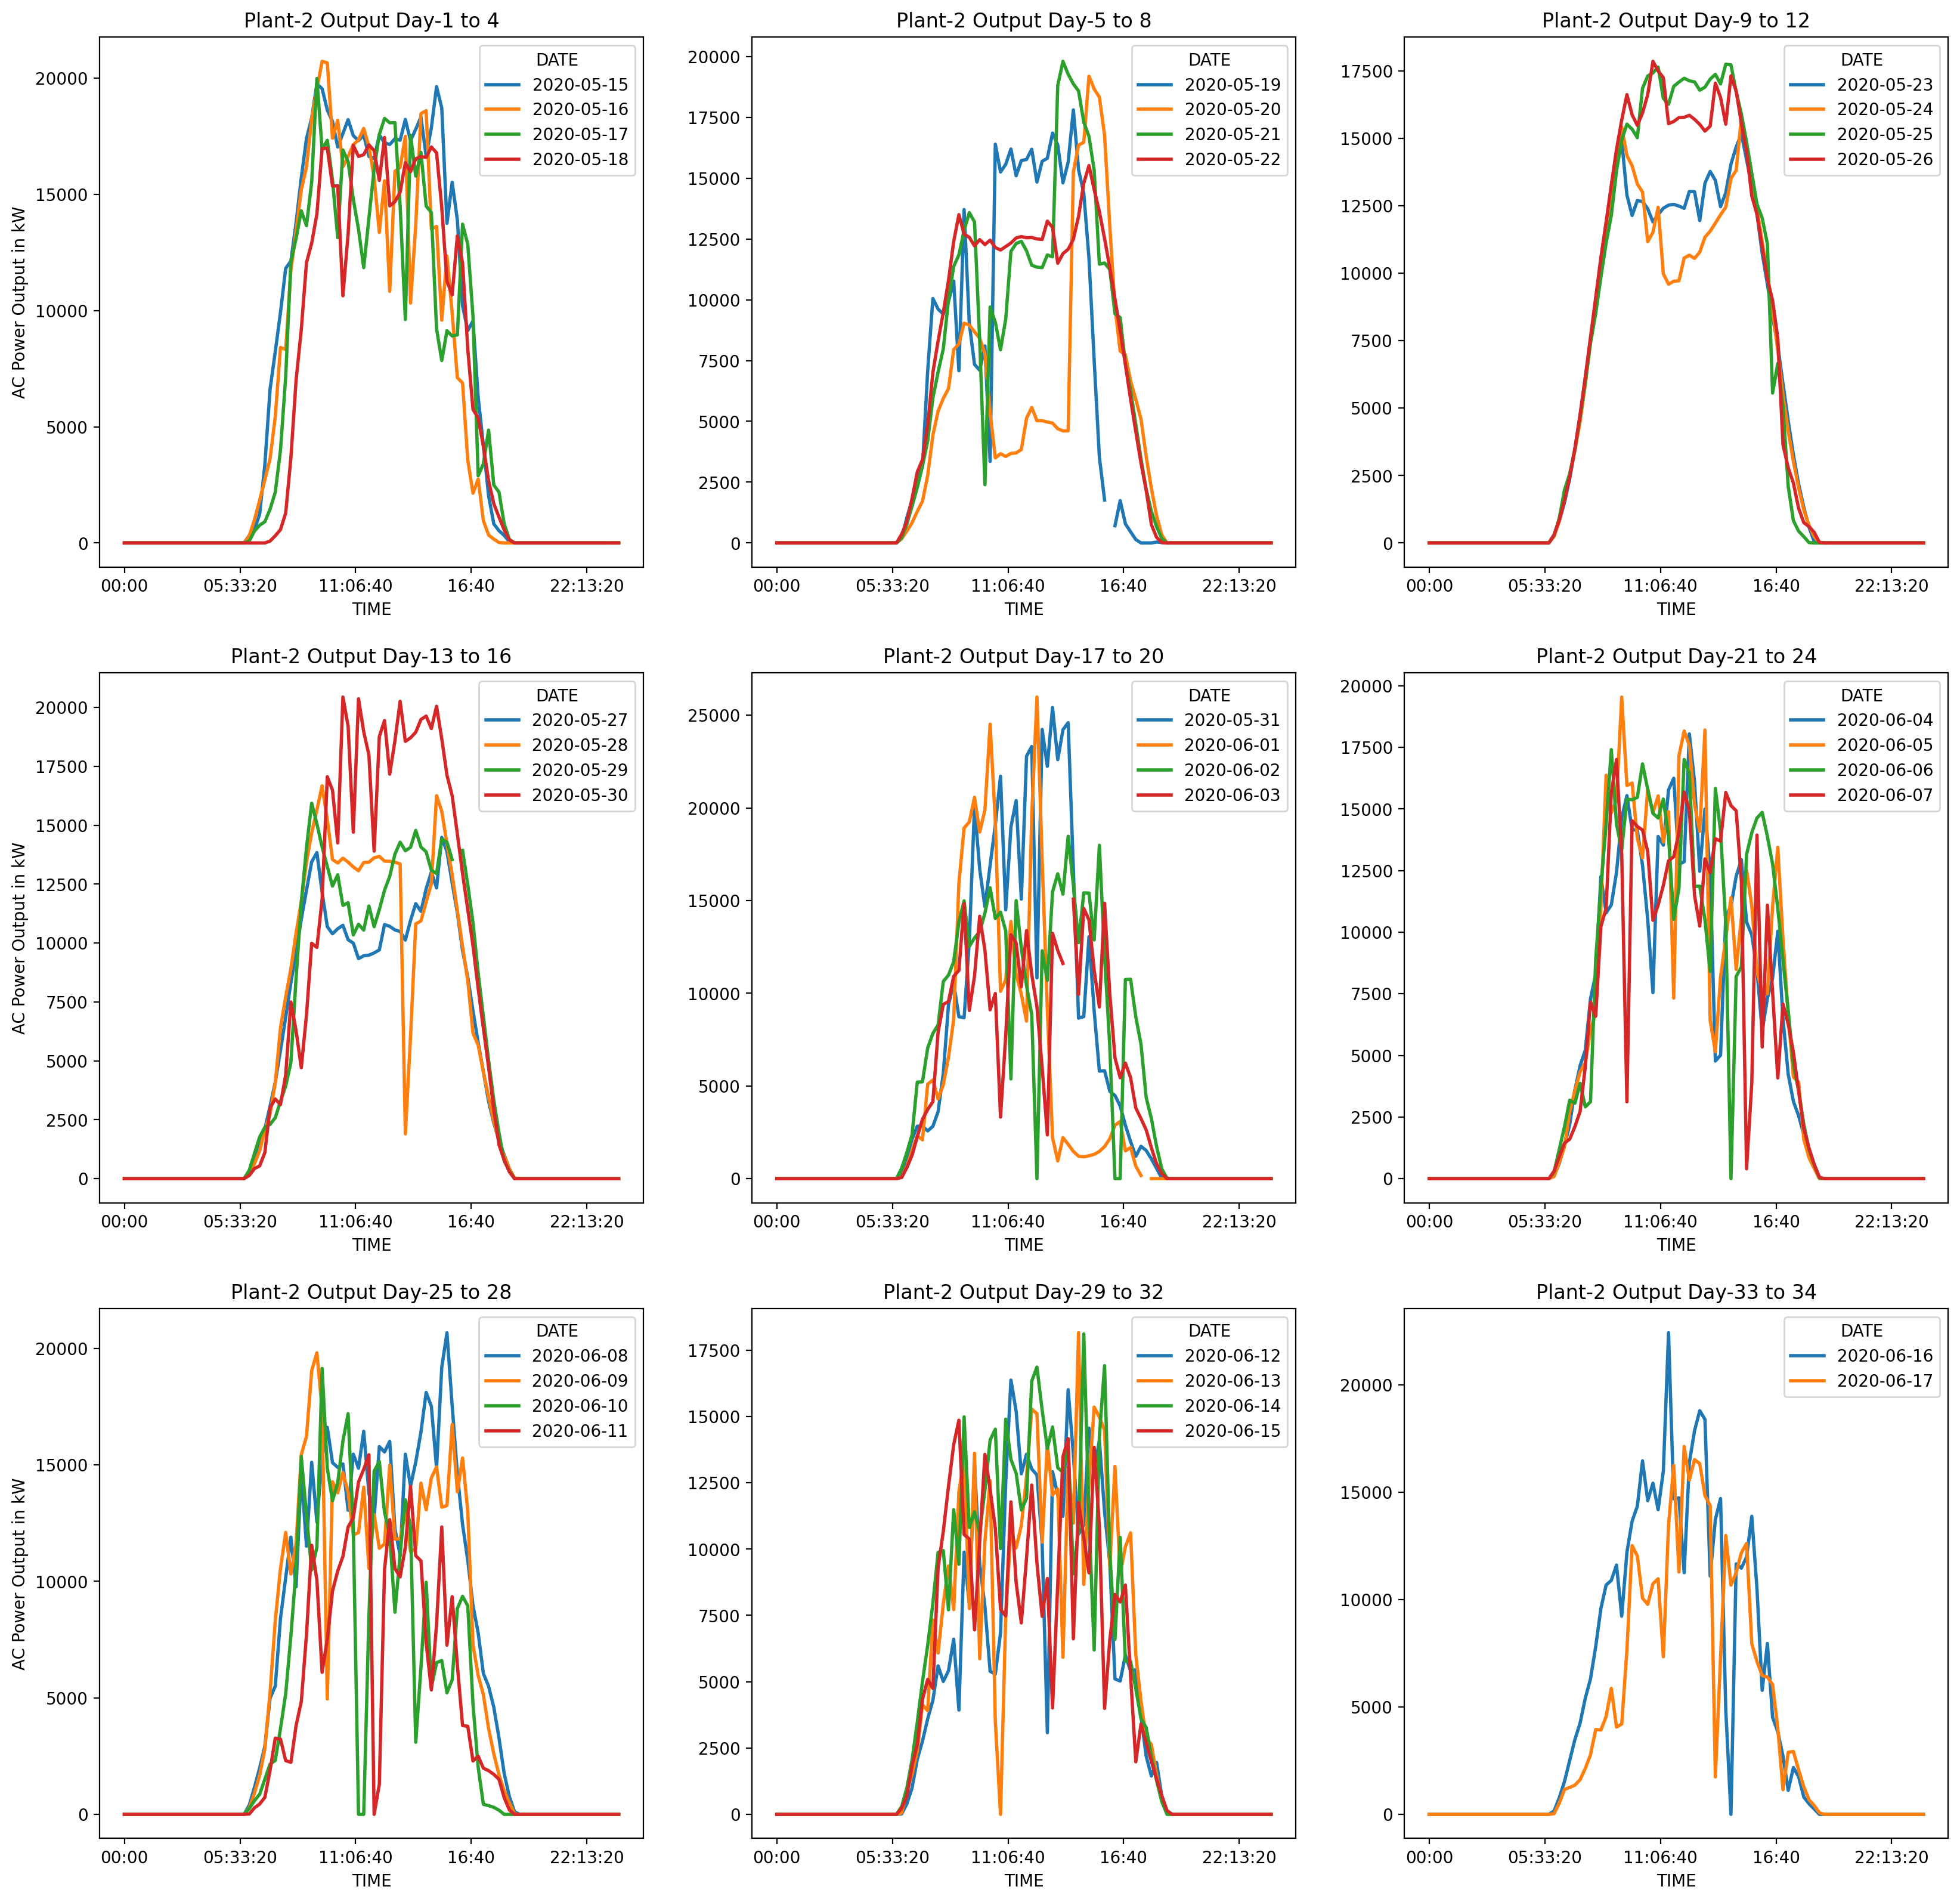

In [163]:
p2_ac_pwr = plant2_data.copy()
p2_ac_pwr = p2_ac_pwr.groupby(['TIME','DATE'])['AC_POWER'].sum().unstack()

fig,ax=pyplot.subplots(ncols=3,nrows=3,dpi=200,figsize=(20,20))
ax[0,0].set_title('Plant-2 Output Day-1 to 4')
ax[0,1].set_title('Plant-2 Output Day-5 to 8')
ax[0,2].set_title('Plant-2 Output Day-9 to 12')
ax[1,0].set_title('Plant-2 Output Day-13 to 16')
ax[1,1].set_title('Plant-2 Output Day-17 to 20')
ax[1,2].set_title('Plant-2 Output Day-21 to 24')
ax[2,0].set_title('Plant-2 Output Day-25 to 28')
ax[2,1].set_title('Plant-2 Output Day-29 to 32')
ax[2,2].set_title('Plant-2 Output Day-33 to 34')

ax[0,0].set_ylabel('AC Power Output in kW')
ax[1,0].set_ylabel('AC Power Output in kW')
ax[2,0].set_ylabel('AC Power Output in kW')
    
p2_ac_pwr.iloc[:,0:4].plot(ax=ax[0,0], linewidth = 2)
p2_ac_pwr.iloc[:,4:8].plot(ax=ax[0,1], linewidth = 2)
p2_ac_pwr.iloc[:,8:12].plot(ax=ax[0,2], linewidth = 2)
p2_ac_pwr.iloc[:,12:16].plot(ax=ax[1,0], linewidth = 2)
p2_ac_pwr.iloc[:,16:20].plot(ax=ax[1,1], linewidth = 2)
p2_ac_pwr.iloc[:,20:24].plot(ax=ax[1,2], linewidth = 2)
p2_ac_pwr.iloc[:,24:28].plot(ax=ax[2,0], linewidth = 2)
p2_ac_pwr.iloc[:,28:32].plot(ax=ax[2,1], linewidth = 2)
p2_ac_pwr.iloc[:,32:].plot(ax=ax[2,2], linewidth = 2)

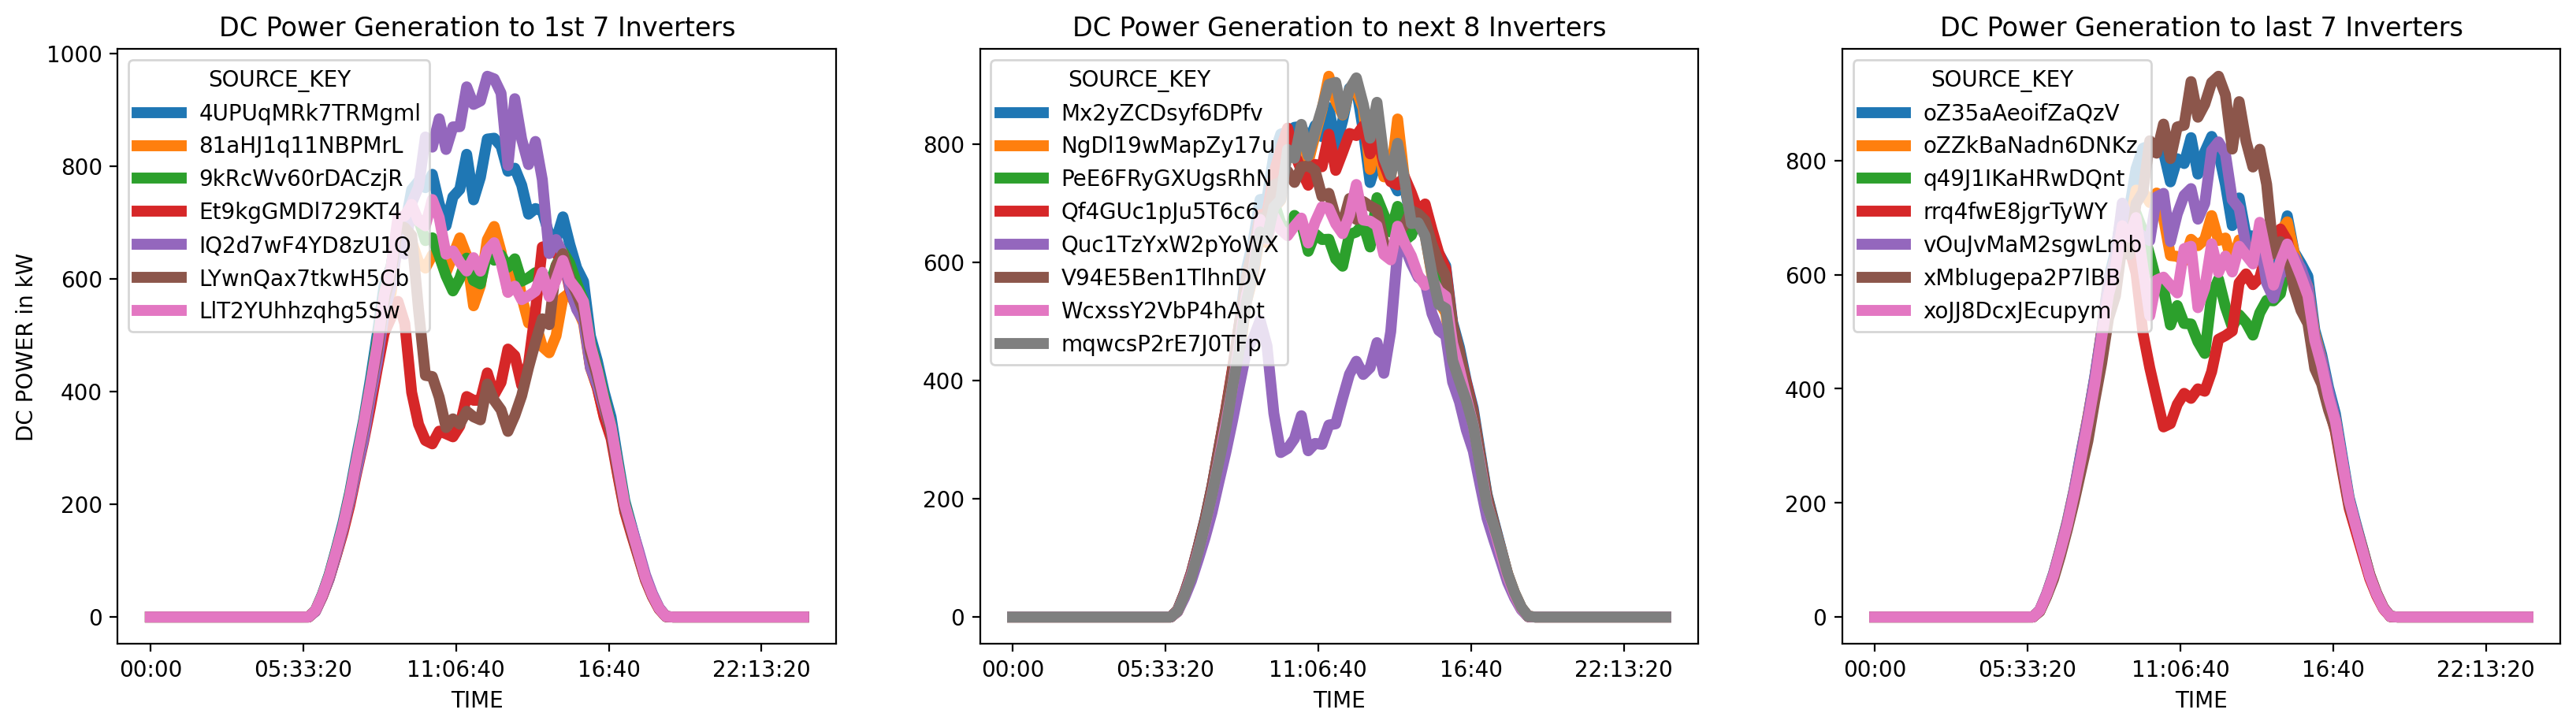

In [164]:
p2_dc_pwr = plant2_data.copy()
p2_dc_pwr = p2_dc_pwr.groupby(['TIME','SOURCE_KEY'])['DC_POWER'].mean().unstack()

fig,ax=pyplot.subplots(ncols=3,nrows=1,dpi=200,figsize=(20,5))
ax[0].set_title('DC Power Generation to 1st 7 Inverters')
ax[1].set_title('DC Power Generation to next 8 Inverters')
ax[2].set_title('DC Power Generation to last 7 Inverters')
ax[0].set_ylabel('DC POWER in kW')


p2_dc_pwr.iloc[:,0:7].plot(ax=ax[0],linewidth = 5)
p2_dc_pwr.iloc[:,7:15].plot(ax=ax[1],linewidth = 5)
p2_dc_pwr.iloc[:,15:22].plot(ax=ax[2],linewidth = 5)

Text(0, 0.5, '% Efficiency')

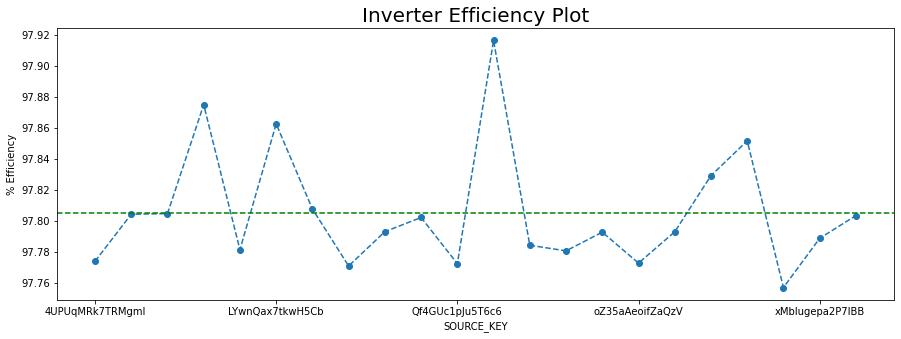

In [165]:
p2gd_Inv_grp = plant2_data.groupby(['SOURCE_KEY']).mean()
p2gd_Inv_grp['Inv_Efficiency']= p2gd_Inv_grp['AC_POWER']*100/p2gd_Inv_grp['DC_POWER']

p2gd_Inv_grp['Inv_Efficiency'].plot(figsize=(15,5), style='o--')
pyplot.axhline(p2gd_Inv_grp['Inv_Efficiency'].mean(),linestyle='--',color='green')
pyplot.title('Inverter Efficiency Plot', size=20)
pyplot.ylabel('% Efficiency')

In [166]:
p2gd_DT = plant2_data.groupby(['DATE_TIME'],as_index=False).sum()
p2gd_DT

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,90992022,0.0,0.0,48899.938095,1.418960e+10
1,2020-05-15 00:15:00,90992022,0.0,0.0,28401.000000,1.418960e+10
2,2020-05-15 00:30:00,90992022,0.0,0.0,28401.000000,1.418960e+10
3,2020-05-15 00:45:00,90992022,0.0,0.0,28401.000000,1.418960e+10
4,2020-05-15 01:00:00,90992022,0.0,0.0,26516.000000,1.418960e+10
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,90992022,0.0,0.0,93040.000000,1.419408e+10
3255,2020-06-17 23:00:00,90992022,0.0,0.0,93040.000000,1.419408e+10
3256,2020-06-17 23:15:00,90992022,0.0,0.0,93040.000000,1.419408e+10
3257,2020-06-17 23:30:00,90992022,0.0,0.0,93040.000000,1.419408e+10


In [167]:
# Remove  unnecesseary columns
p2gd_DT_Select = p2gd_DT[['DATE_TIME','DC_POWER','AC_POWER','DAILY_YIELD']]
p2gd_DT_Select

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD
0,2020-05-15 00:00:00,0.0,0.0,48899.938095
1,2020-05-15 00:15:00,0.0,0.0,28401.000000
2,2020-05-15 00:30:00,0.0,0.0,28401.000000
3,2020-05-15 00:45:00,0.0,0.0,28401.000000
4,2020-05-15 01:00:00,0.0,0.0,26516.000000
...,...,...,...,...
3254,2020-06-17 22:45:00,0.0,0.0,93040.000000
3255,2020-06-17 23:00:00,0.0,0.0,93040.000000
3256,2020-06-17 23:15:00,0.0,0.0,93040.000000
3257,2020-06-17 23:30:00,0.0,0.0,93040.000000


In [168]:
#Retaining relevant data
p2wd_drp = plant2_weather.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)
p2wd_drp

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
0,2020-05-15 00:00:00,27.004764,25.060789,0.0,2020-05-15,00:00:00
1,2020-05-15 00:15:00,26.880811,24.421869,0.0,2020-05-15,00:15:00
2,2020-05-15 00:30:00,26.682055,24.427290,0.0,2020-05-15,00:30:00
3,2020-05-15 00:45:00,26.500589,24.420678,0.0,2020-05-15,00:45:00
4,2020-05-15 01:00:00,26.596148,25.088210,0.0,2020-05-15,01:00:00
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,23.511703,22.856201,0.0,2020-06-17,22:45:00
3255,2020-06-17 23:00:00,23.482282,22.744190,0.0,2020-06-17,23:00:00
3256,2020-06-17 23:15:00,23.354743,22.492245,0.0,2020-06-17,23:15:00
3257,2020-06-17 23:30:00,23.291048,22.373909,0.0,2020-06-17,23:30:00


In [169]:
merged_data = pd.merge(p2gd_DT_Select, p2wd_drp, how='inner', on='DATE_TIME')
merged_data

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
0,2020-05-15 00:00:00,0.0,0.0,48899.938095,27.004764,25.060789,0.0,2020-05-15,00:00:00
1,2020-05-15 00:15:00,0.0,0.0,28401.000000,26.880811,24.421869,0.0,2020-05-15,00:15:00
2,2020-05-15 00:30:00,0.0,0.0,28401.000000,26.682055,24.427290,0.0,2020-05-15,00:30:00
3,2020-05-15 00:45:00,0.0,0.0,28401.000000,26.500589,24.420678,0.0,2020-05-15,00:45:00
4,2020-05-15 01:00:00,0.0,0.0,26516.000000,26.596148,25.088210,0.0,2020-05-15,01:00:00
...,...,...,...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,0.0,0.0,93040.000000,23.511703,22.856201,0.0,2020-06-17,22:45:00
3255,2020-06-17 23:00:00,0.0,0.0,93040.000000,23.482282,22.744190,0.0,2020-06-17,23:00:00
3256,2020-06-17 23:15:00,0.0,0.0,93040.000000,23.354743,22.492245,0.0,2020-06-17,23:15:00
3257,2020-06-17 23:30:00,0.0,0.0,93040.000000,23.291048,22.373909,0.0,2020-06-17,23:30:00


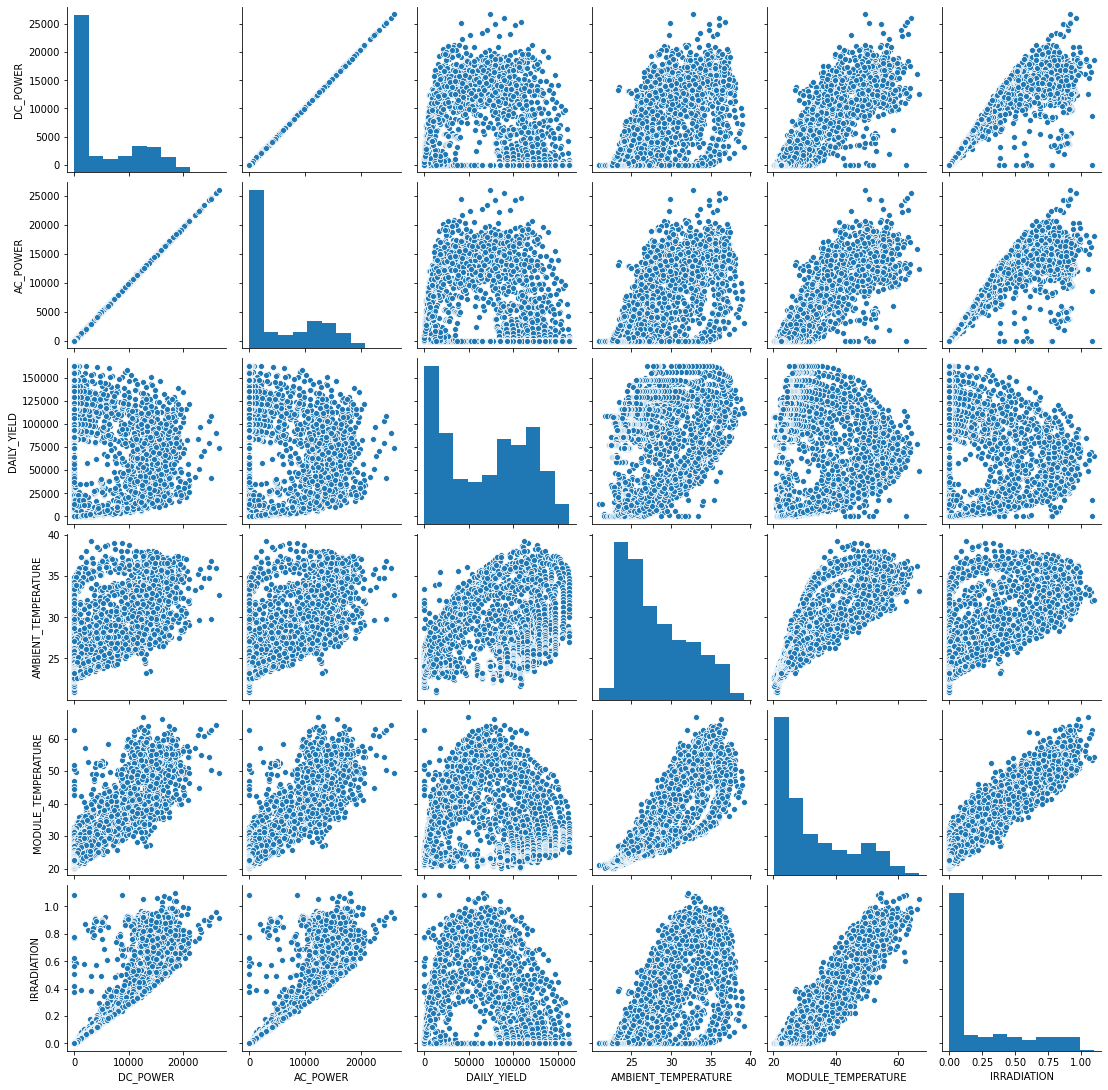

In [171]:
# Describe with column combined plots
sns.pairplot(merged_data[['DC_POWER','AC_POWER','DAILY_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']])